# MALIGNANT COMMENTS CLASSIFICATION PROJECT

## Importing the Libraries

In [83]:
#Import libreries 

import pandas as pd #Data processing
import numpy as np #Linear algebra
from sklearn.preprocessing import StandardScaler #resize the distribution of values
from sklearn.linear_model import LinearRegression #algorithm
from sklearn.model_selection import train_test_split #estimate the performance
import statsmodels.api as sm 
import matplotlib.pyplot as plt #data visualization
import seaborn as sn  #data visualization

import warnings
warnings.filterwarnings("ignore")

Importing all neccessory Libreries

## Importing train dataset

In [2]:
#Import the dataset

data1= pd.read_csv(r"C:\Users\Chaitali Nakade\OneDrive\Desktop\dataset\malignant.csv")
data1.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


Importing the train dataset and see all columns with first five rows.

In [3]:
label = []
for i in data1["malignant"]:
    if i==0:
        label.append(i)
    elif i==1:
        label.append(i)

In [4]:
label1 = []
for i in data1["highly_malignant"]:
    if i==0:
        label1.append(0)
    elif i==1:
        label1.append(1)


In [5]:
label2 = []
for i in data1["rude"]:
    if i==0:
        label2.append(0)
    elif i==1:
        label2.append(1)


In [6]:
label3 = []
for i in data1["threat"]:
    if i==0:
        label3.append(0)
    elif i==1:
        label3.append(1)


In [7]:
label4 = []
for i in data1["abuse"]:
    if i==0:
        label4.append(0)
    elif i==1:
        label4.append(1)


In [8]:
label5 = []
for i in data1["loathe"]:
    if i==0:
        label5.append(0)
    elif i==1:
        label5.append(1)


In [9]:
Label = [x | y | z | a | b |c for x, y, z, a, b, c in zip(label, label1, label2, label3, label4, label5)]

In [10]:
data1["LABEL"] = Label

In [11]:
data1

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,LABEL
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,0


### As I had created a label column. Now I can drop remaining malignant, highly_malignant, rude, threat, abuse and loathe

In [12]:
#drop malignant column
data1 = data1.drop(['malignant'], axis=1)

In [13]:
#drop highly_malignant column
data1 = data1.drop(['highly_malignant'], axis=1)

In [14]:
#drop rude column
data1 = data1.drop(['rude'], axis=1)

In [15]:
#drop threat column
data1 = data1.drop(['threat'], axis=1)

In [16]:
#drop abuse column
data1 = data1.drop(['abuse'], axis=1)

In [17]:
#drop loathe column
data1 = data1.drop(['loathe'], axis=1)

## Shape of data with number of rows and columns

In [18]:
data1.shape

(159571, 3)

There are 159571 Rows and 3 Columns in training dataset

## Basic information of dataset

In [19]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            159571 non-null  object
 1   comment_text  159571 non-null  object
 2   LABEL         159571 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.7+ MB


-	With this instruction we will get the basic information like is there any null value present in whole dataset, datatypes of all column and non-null values of column and column names. As shown in output there is null values present some columns in dataset.
- Simultaneously we can find here only 2 column is having object data types --> id, comment_text
- 1 column is having integer datatype --> LABEL
- LABEL is a target variable

## Detailed description

In [20]:
data1.describe()

,LABEL
count,159571.000000
mean,0.101679
std,0.302226
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


We can see the detailed description of all the rows and columns like count, mean value, standard deviation, minimum and maximum value training dataset.

# Datatypes of all columns

In [21]:
data1.dtypes

id              object
comment_text    object
LABEL            int64
dtype: object

- we can find here only 2 column is having object data types --> id, comment_text
- 1 column is having integer datatype --> label

# Checking is there any null value

In [22]:
#check is there any null value present in any column

data1.isnull().sum()

id              0
comment_text    0
LABEL           0
dtype: int64

- There is no null value present in whole train dataset.

### visualization of missing values by heatmap

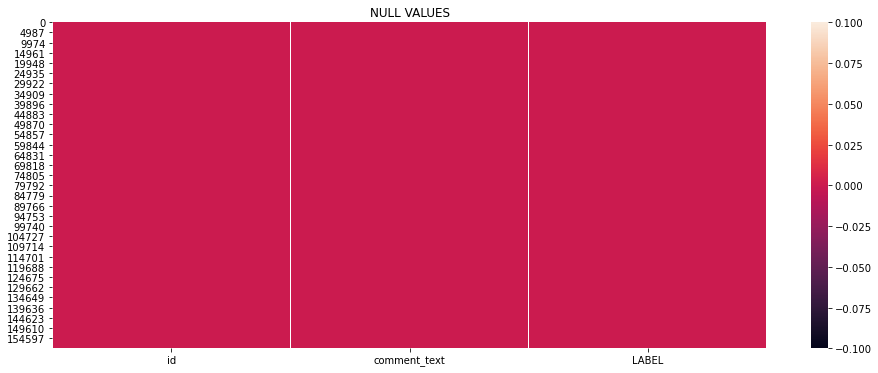

In [23]:
plt.figure(figsize=[16,6])
sn.heatmap(data1.isnull())
plt.title("NULL VALUES")
plt.show()

we can see there are no missing values present in any columns of train dataset 

## EDA (Exploratory Data Analysis)

### Visualization (Uni Variate analysis)
Uni variate analysis works with only one variable, hence it is called uni variate.

In [24]:
fe = data1[['LABEL']]

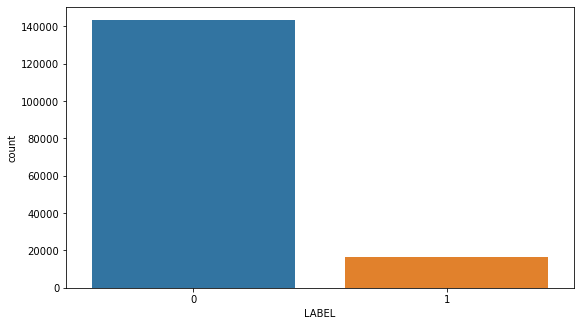

In [25]:
plt.figure(figsize = (20,30), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 10: # as we see there are 81 columns in the data
        ax = plt.subplot(5,2,plotnumber)
        sn.countplot(fe[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber += 1
plt.show()

- From above plot we can find out majority of the people are not putting malignant or we can harmful comments like in malignant column more than 140000 are putting good comments/normal comments whereas less than 2000 people was putting bad comments 
- similarly the count of highly malignant column is also less which is represnts through 1
- LABEL is a target variable and which is having very less bad comments and normal/good comments are maximum and many more things can see.

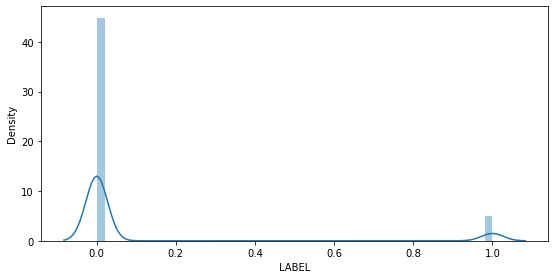

In [26]:
plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 10: # as we see there are 81 columns in the data
        ax = plt.subplot(5,2,plotnumber)
        sn.distplot(fe[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber += 1
plt.show()

above all columns are catogorical in nature so not to worry about skewness and but we can see majority of comments are not malignant in nature.

#### Histplot

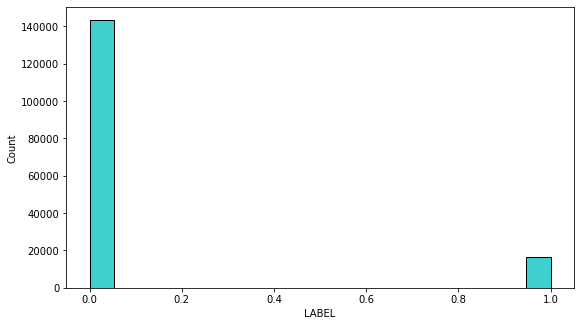

In [27]:
#Relationship Visualizing

plt.figure(figsize = (20,30), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 10: # as we see there are 81 columns in the data
        ax = plt.subplot(5,2,plotnumber)
        sn.histplot(fe[column], color = 'c')
        plt.xlabel(column,fontsize=10)
        
    plotnumber += 1
plt.show()

aftere comparing all the columns we can see bad comments are very less as comapre to normal and good comments.

### Analysis through boxplot

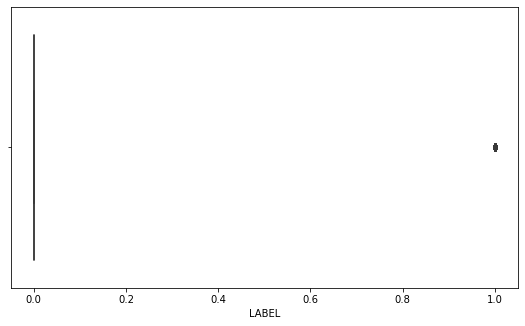

In [28]:
#Relationship Visualizing

plt.figure(figsize = (20,30), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 10: # as we see there are 81 columns in the data
        ax = plt.subplot(5,2,plotnumber)
        sn.boxplot(fe[column], color = 'c')
        plt.xlabel(column,fontsize=10)
        
    plotnumber += 1
plt.show()

##### As we have seen all variables are having outliers in it but is it catogorical in nature.

## Multi Variate analysis

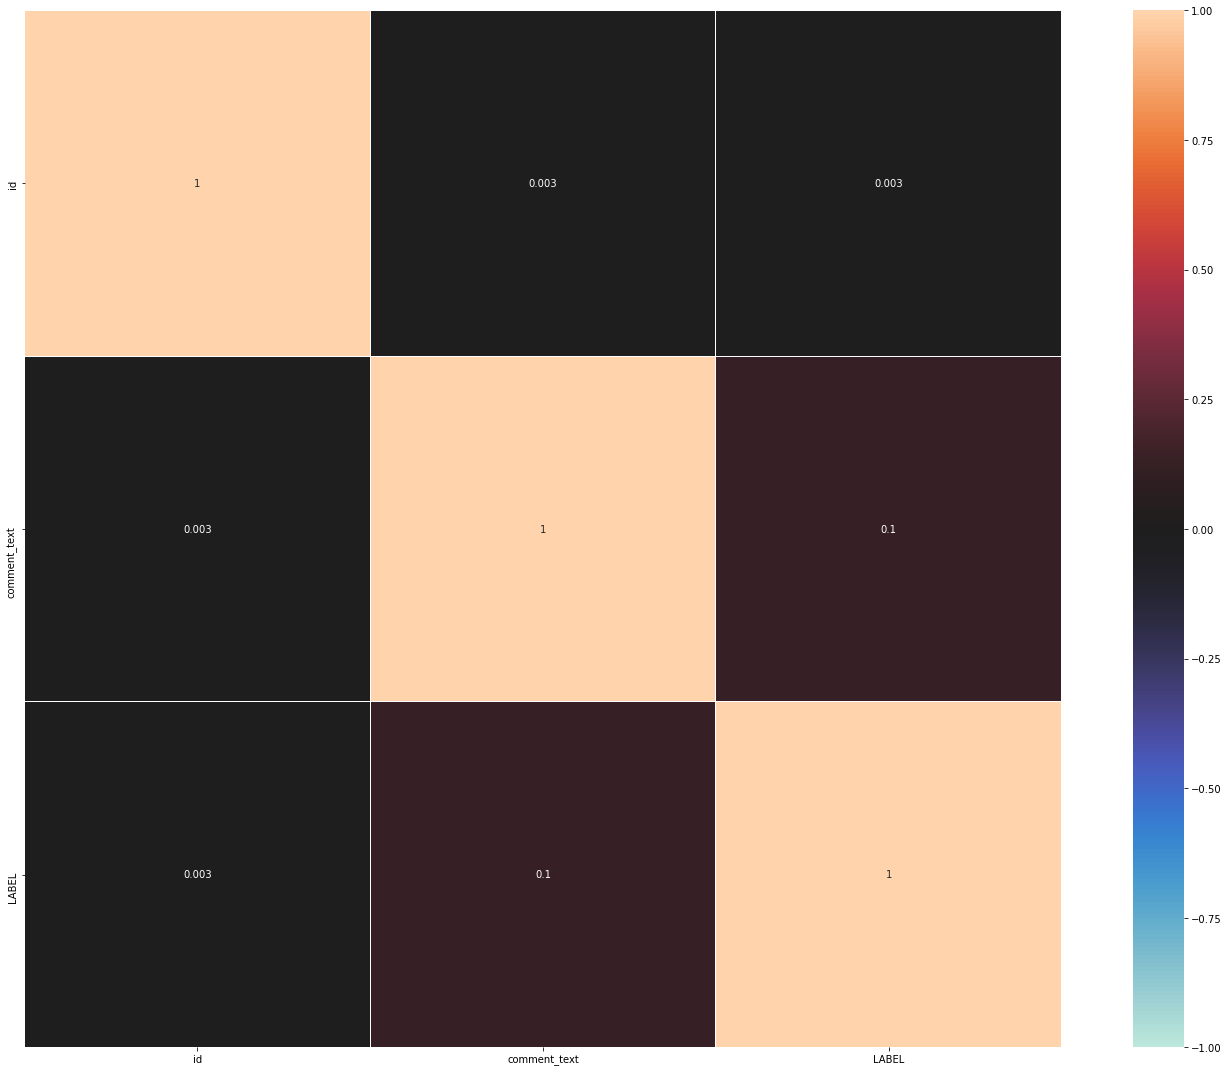

In [168]:
data_cor = data1.corr().abs()

plt.figure(figsize = (20,15))
sn.heatmap(data_cor, vmin=-1, vmax= 1, annot=True, square=True,
          center=0, fmt='.1g', linewidths=.1)
plt.tight_layout()

##### as we can see malignant is highly correlated with target variable followed by abuse and rude comment.
##### where as threat column is purely correlate with target variable.

## Encoding/dropping columns

In [31]:
data1.dtypes

id              object
comment_text    object
LABEL            int64
dtype: object

#### 1. MSZoning

In [32]:
# Check unique values of id column
data1['id'].unique()

array(['0000997932d777bf', '000103f0d9cfb60f', '000113f07ec002fd', ...,
       'ffee36eab5c267c9', 'fff125370e4aaaf3', 'fff46fc426af1f9a'],
      dtype=object)

In [33]:
#value caounts of MSZoning column
data1['id'].value_counts()

ea316036fcc21b71    1
9e2ab6159c4d0e8c    1
7a35e16485a04429    1
383b632d51f721b7    1
f97396e17fcaf079    1
                   ..
de38d7454d0f0cb6    1
e9c03c93bd2b7dcd    1
4ec7d2dd11283ba7    1
ffa2d4579bb675f6    1
d5a65b5df6224fed    1
Name: id, Length: 159571, dtype: int64

In [ ]:
#As we can see id column is having all unique data so, we can drop that column
#drop id column
data1 = data1.drop(['id'], axis=1)

##### we can see more than 70% data is having similar value so we can drop that columns

#### 2. Street

In [34]:
#value caounts of comment_text column
data1['comment_text'].value_counts()

About the religion a part of Arvanites were muslim besides the majority christians, and in Albanian they are called Arvanitet. Dodona                                                                                                                                                                                                                                                        1
. You should be ashamed of yourself. Of course, you won't, because you're a Wikipedian, and therefore beneath shame.                                                                                                                                                                                                                                                                         1
AMNESTY INTERNATIONAL  \n\nConsider that\nCHRISTOPHER FRANZ SCHULTCHEN \n\nWELCOME TO THE CAMP                                                                                                                                            

### Encode all columns which are having object data type

In [36]:
#import label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
for i in data1.columns:
    if data1[i].dtypes=="object":
        data1[i]=le.fit_transform(data1[i].values.reshape(-1,1))

In [172]:
data1

,id,comment_text,LABEL
0,0,72698,0
1,1,68359,0
2,2,79594,0
3,4,35519,0
4,5,146426,0
...,...,...,...
159566,159505,44289,0
159567,159510,145720,0
159568,159524,122203,0
159569,159535,60037,0


### after encoding check the correlation with target variable

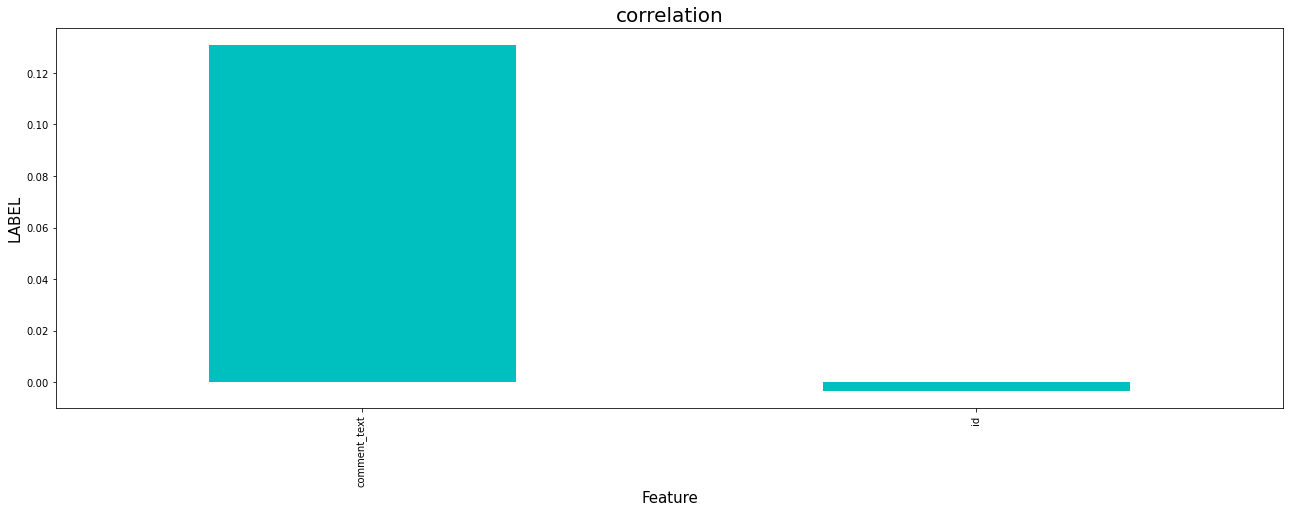

In [38]:
plt.figure(figsize=(22,7))
data1.corr()['LABEL'].sort_values(ascending = False).drop(['LABEL']).plot(kind = 'bar', color = 'c')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('LABEL', fontsize = 15)
plt.title('correlation', fontsize = 20)
plt.show()

## Remove outliers

In [39]:
data1.dtypes

id              int32
comment_text    int32
LABEL           int64
dtype: object

as shown in above there are not any column is contineous in nature. no need to work on outlier

## Check the skewness and remove that

In [40]:
data1.skew()

id              7.386055e-17
comment_text    1.282301e-19
LABEL           2.635944e+00
dtype: float64

If the value of contineous columns is greater than +/-0.5 than it will be considerd as a skewness present in that column and We can see skewness present in above columns but that columns are catagoriacal in nature. so no need to femove skewness from that and proceed further.

### Check outliers datatype. If data types of skewed column is catogorical than no need to remove skewness from that variable.

# Work on Test dataset

In [41]:
#Import the dataset

test_data= pd.read_csv(r"C:\Users\Chaitali Nakade\OneDrive\Desktop\dataset\malignanttest.csv")
test_data.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


Importing the test dataset and see all columns with first five rows.

## Shape of data with number of rows and columns

In [42]:
test_data.shape

(153164, 2)

There are 153164 Rows and 2 Columns in test dataset

## Basic information of dataset

In [43]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB






- With this instruction we will get the basic information like is there any null value present in whole dataset, datatypes of all column and non-null values of column and column names. As shown in output there is null values present some columns in dataset.
- Simultaneously we can find here two columns are having object data types.

## Detailed description test dataset

In [44]:
test_data.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,332b6a945e0835a9,"::Thanks Kos , 23:26 19 December 2006 (GMT)."
freq,1,1


We can see the detailed description of all the rows and columns like count, mean value, standard deviation, minimum and maximum value of dataset.

## Checking is there any null value

In [45]:
#check is there any null value present in any column
test_data.isnull().sum()

id              0
comment_text    0
dtype: int64

no null values present in whole dataset

## Encode/drop the columns

### Encode all columns which are having object data type

In [46]:
#import label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [47]:
for i in test_data.columns:
    if test_data[i].dtypes=="object":
        test_data[i]=le.fit_transform(test_data[i].values.reshape(-1,1))

In [171]:
test_data

,id,comment_text
0,0,139489
1,1,82945
2,2,15380
3,3,71743
4,4,116535
...,...,...
153159,153159,51845
153160,153160,93347
153161,153161,13499
153162,153162,8042


## Remove outliers

In [48]:
test_data.skew()

id              0.000000e+00
comment_text    1.510704e-18
dtype: float64

## Seperating the columns into featuers and target:

#### x= features, y=Target 

In [58]:
x = data1.drop(columns = 'LABEL', axis=1)
y = data1['LABEL']
x1 = test_data

test dataset and train dataset are scalled now

## scaling 

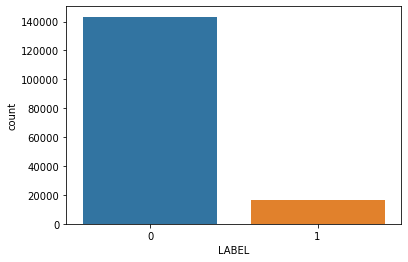

In [59]:
#visualization of target variable 
sn.countplot(data1["LABEL"])
plt.show()

In [60]:
y.value_counts()

0    143346
1     16225
Name: LABEL, dtype: int64

In [61]:
#import Libraries
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scaled = ss.fit_transform(x)

In [62]:
from imblearn.over_sampling import RandomOverSampler  #Random Over Sampler
ROS = RandomOverSampler()
x_res, y_res = ROS.fit_resample(x_scaled, y) # it will resample the data
print(y_res.value_counts()) # after this all classes will be balaned

1    143346
0    143346
Name: LABEL, dtype: int64


In [63]:
y_res.value_counts()

1    143346
0    143346
Name: LABEL, dtype: int64

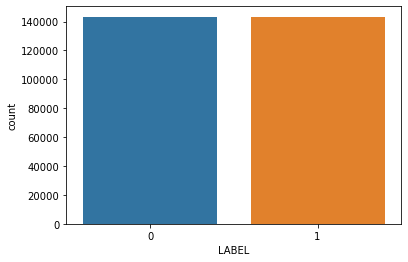

In [64]:
#visualization of target variable 
sn.countplot(y_res)
plt.show()

## Variance inflation factor

In [65]:
#import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,1.000008,id
1,1.000008,comment_text


In [66]:
#import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x1_scalar, i) for i in range(x1_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,1.000004,id
1,1.000004,comment_text


as we see above vif value of all columns is less than 10. we can proceed further

## Finding best random state

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [68]:
from sklearn.tree import DecisionTreeClassifier
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_res,y_res, test_size=.30, random_state=i)
    mod= DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, "on Random_state ", maxRS)

Best accuracy is  0.9503418286671007 on Random_state  35


In [69]:
x_train,x_test,y_train,y_test = train_test_split(x_res, y_res, test_size=0.2, random_state = 35)

## 1.Logistic Regression Model

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Log_reg =LogisticRegression()
Log_reg.fit(x_train, y_train)

LogisticRegression()

In [71]:
pred_test=Log_reg.predict(x_test)

In [72]:
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.562549050384555
[[16212 12609]
 [12474 16044]]
              precision    recall  f1-score   support

           0       0.57      0.56      0.56     28821
           1       0.56      0.56      0.56     28518

    accuracy                           0.56     57339
   macro avg       0.56      0.56      0.56     57339
weighted avg       0.56      0.56      0.56     57339



In [73]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(Log_reg, x_res, y_res, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5122292112403702

In [89]:
0.562549050384555-0.5122292112403702

0.05031983914418481

###### The Accuracy score for linear regression model is : 56.25%
###### Cross validation score for linear regression is : 51.22%

## 2.Random forest Classifier

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters ={'criterion':['gini', 'entropy'], 'max_features':["auto","sqrt","log2"]}
Rfr= RandomForestClassifier()
clf =GridSearchCV(Rfr, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'sqrt'}


In [77]:
Rfr =RandomForestClassifier(criterion = "entropy", max_features="sqrt")
Rfr.fit(x_train, y_train)
Rfr.score(x_train, y_train)
pred_decision = Rfr.predict(x_test)

Rfrs = accuracy_score(y_test,pred_decision)
print('accuracy score: ',Rfrs*100)

Rfrscore = cross_val_score(Rfr, x_res, y_res, cv=3)
Rfrc = Rfrscore.mean()
print('Cross Val Score: ',Rfrc*100)

accuracy score:  96.75090252707581
Cross Val Score:  93.6716057650719


In [90]:
96.75090252707581-93.6716057650719

3.0792967620039065

###### The Accuracy score for Random Forest Classifier model is : 96.75%
###### Cross validation score for Random Forest Classifier is : 93.67%

## 3.Decision Tree Classifier

In [78]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [79]:
pred_DT = DT.predict(x_test)
print(accuracy_score(y_test,pred_DT))

0.954115000261602


In [80]:
print(confusion_matrix(y_test,pred_DT))
print(classification_report(y_test,pred_DT))

[[26209  2612]
 [   19 28499]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     28821
           1       0.92      1.00      0.96     28518

    accuracy                           0.95     57339
   macro avg       0.96      0.95      0.95     57339
weighted avg       0.96      0.95      0.95     57339



In [81]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(DT, x_res, y_res, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.9284040902322441

In [93]:
0.9541-0.9284

0.025699999999999945

###### The Accuracy score for Decision tree Regressor model is : 95.41%
###### Cross validation score for Decision tree Regressor is : 92.84%

## 4.KNeighbors Classifier

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [85]:
pred_knn = knn.predict(x_test)
print(accuracy_score(y_test,pred_knn))

0.8949754966078934


In [86]:
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

[[22883  5938]
 [   84 28434]]
              precision    recall  f1-score   support

           0       1.00      0.79      0.88     28821
           1       0.83      1.00      0.90     28518

    accuracy                           0.89     57339
   macro avg       0.91      0.90      0.89     57339
weighted avg       0.91      0.89      0.89     57339



In [87]:
cv_score= cross_val_score(knn, x_res, y_res, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8502994308566592

In [94]:
0.8949754966078934-0.8502994308566592

0.044676065751234284

###### The Accuracy score for KNeighbors classifier model is : 95.41%
###### Cross validation score for KNeighbors classifier is : 92.84%

## Comparison of all model

#### The diffrence between accuracy score and cross validation score of logistic regression model is : 5.03%
#### The diffrence between accuracy score and cross validation score of Random Forest classifier model is : 3.07%
#### The diffrence between accuracy score and cross validation score of Decision tree classifier model is : 2.56%
#### The diffrence between accuracy score and cross validation score of Kneighbors classifier model is : 4.46%

### after comapairing all models we can see DECISION TREE CLASSIFIER is a best model. Now, proceed further

## Hyper parameter tunning

### Hyper parameter tuning for Decision Tree Classifier

In [95]:
# Decision tree Classifier
Parameters = {'max_depth': [2, 3, 5, 10, 20],
              'min_samples_leaf': [1, 10, 20, 50, 100],
              'criterion': ["gini", "entropy"],
              'splitter' : ["best", "random"]
             }

In [96]:
GCV=GridSearchCV(DecisionTreeClassifier(),Parameters,cv=5)

In [105]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [1, 10, 20, 50, 100],
                         'splitter': ['best', 'random']})

In [106]:
GCV.best_params_ # printing the best parameters found by GridSearchCV

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'splitter': 'random'}

In [109]:
mod = DecisionTreeClassifier( criterion= 'gini', max_depth= 50, min_samples_leaf= 1, splitter='best')

mod.fit(x_train, y_train)
pred =mod.predict(x_test)
print(accuracy_score(y_test, pred)*100)

95.40452397146794


### after hyper parameter tunning accuracy score is: 95.40%

## Boosting of model with Gradient Boosting Classifier

In [120]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()

In [121]:
GBC.fit(x_train, y_train)
y_pred = GBC.predict(x_train)

In [122]:
from sklearn import metrics
print('accuracy square score', metrics.accuracy_score(y_train, y_pred))

accuracy square score 0.6565032940489115


#### after boosting of model the model accuracy score is : 100%

## ROC AUC curve to choose best model

In [123]:
# plot ROC/AUC for multiple models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [125]:
lr = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [126]:
#train all classifiers
lr.fit(x_train, y_train)
rf.fit(x_train, y_train)
dt.fit(x_train, y_train)
knn.fit(x_train, y_train)

print("Now all models are trained")

Now all models are trained


In [127]:
#All model score captured

lr.score(x_train, y_train)
rf.score(x_train, y_train)
dt.score(x_train, y_train)
knn.score(x_train, y_train)

print("all model test score captured")

all model test score captured


## find ROC AUC Score

In [128]:
#logistic Regression
roc_auc_score(y_test, lr.predict(x_test))

0.5625492764005382

In [129]:
# Random Forest Classifier
roc_auc_score(y_test, rf.predict(x_test))

0.9674162720302372

In [130]:
#Decision Tree Classifier
roc_auc_score(y_test, dt.predict(x_test))

0.954942912758673

In [131]:
#SVC
roc_auc_score(y_test, knn.predict(x_test))

0.8498609746953149

## Ploting AUC ROC curve

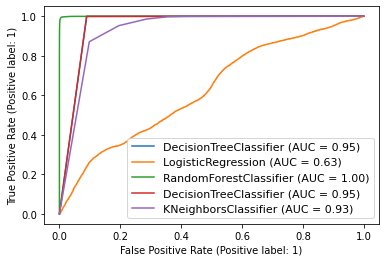

In [132]:
disp = plot_roc_curve(dt, x_test, y_test)

plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)

plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)

plot_roc_curve(dt, x_test, y_test, ax=disp.ax_)

plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)

plt.legend(prop = {'size':11}, loc='lower right')

plt.show()

## Saving the model 

In [133]:
import joblib
joblib.dump(mod,"Malignant1.pkl")

['Malignant1.pkl']

## Loding model

In [134]:
model = joblib.load("Malignant1.pkl")

In [151]:
prediction = model.predict(x_test)

In [152]:
predicted_values=pd.DataFrame({'Actual' :y_test, 'Predicted' :prediction})
#converted into data frame

In [157]:
predicted_values.head(20)

,Actual,Predicted
264386,1,1
49850,0,0
78885,0,0
87162,0,0
110562,0,0
3876,0,0
260908,1,1
182253,1,1
225691,1,1
19025,0,0


In [158]:
prediction = model.predict(x1)

In [169]:
predicted_values1=pd.DataFrame({'Predicted' :prediction})

In [170]:
predicted_values1.to_csv('Malignant1Results.csv', index = False)
#prediction saving

#### model saved